In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('firing 3.csv')

In [22]:
thrust_cali = pd.read_csv('thrust calibration.csv')
nitrous_cali = pd.read_csv('nitrous calibration.csv')

In [23]:
data.describe()

,Time,Nitrous,Thrust
count,60000.000000,60000.000000,60000.000000
mean,29999.500000,0.114172,-0.071869
std,17320.652413,0.007923,0.051823
min,0.000000,0.065000,-0.574000
25%,14999.750000,0.111000,-0.053400
50%,29999.500000,0.119000,-0.050700
75%,44999.250000,0.119000,-0.049100
max,59999.000000,0.132000,-0.041400


In [24]:
data.columns

Index(['Time ', 'Nitrous', 'Thrust'], dtype='object')

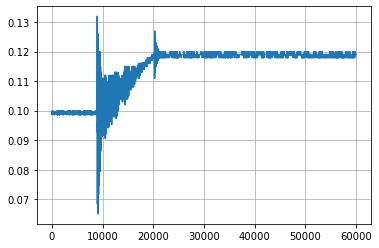

In [25]:
plt.plot(data['Time '], data['Nitrous'])
plt.grid()

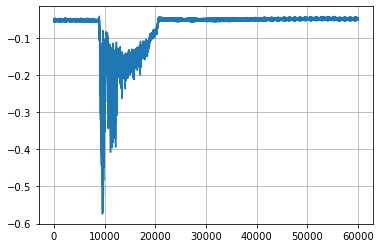

In [26]:
plt.plot(data['Time '], data['Thrust'])
plt.grid()

In [29]:
thrust_cali.describe()

,Time (mS),Thrust
count,60000.000000,60000.000000
mean,29999.500000,-0.021509
std,17320.652413,0.116836
min,0.000000,-0.260000
25%,14999.750000,-0.023800
50%,29999.500000,0.043800
75%,44999.250000,0.045800
max,59999.000000,0.050700


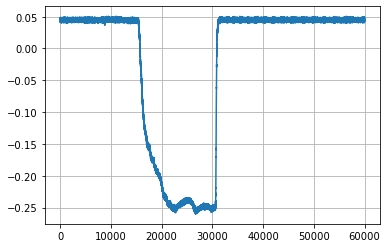

In [34]:
plt.plot(thrust_cali['Thrust'])
plt.grid()

In [52]:
applied_load = thrust_cali[(thrust_cali['Time (mS)'] > 25000) & (thrust_cali['Time (mS)'] < 30000)]
zero_load = thrust_cali[(thrust_cali['Time (mS)'] < 10000) | (thrust_cali['Time (mS)'] > 50000)]

In [56]:
zero_thrust = zero_load['Thrust'].mean()
zero_thrust

0.04486149307465373

In [57]:
applied_thrust = applied_load['Thrust'].mean()
applied_thrust

-0.24807041408281652

In [59]:
thrust_N_per_volt = 120/(applied_thrust-zero_thrust)
thrust_N_per_volt

-409.65151650582084

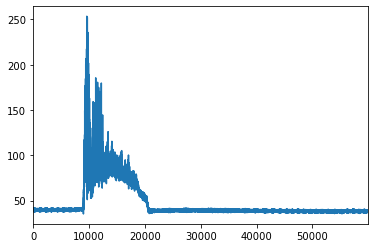

In [67]:
thrust_N = (thrust_N_per_volt*(data['Thrust'] - zero_thrust))
thrust_N.plot()

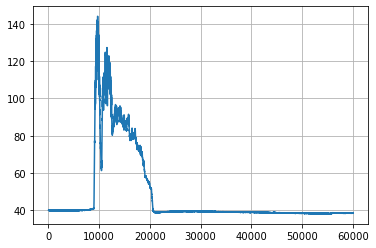

In [72]:
plt.plot(data['Time '], (thrust_N.rolling(window=50).mean()))
plt.grid()

In [100]:
thrust_N_avg = (thrust_N.rolling(window=50).mean())-thrust_N[0:5000].mean()
thrust_N_avg.describe()

count    59951.000000
mean         8.064007
std         20.252994
min         -1.854902
25%         -1.240425
50%         -0.668551
75%          0.072918
max        104.476703
Name: Thrust, dtype: float64

In [115]:
np.trapz(thrust_N_avg[pd.notna(thrust_N_avg)])/1000

483.4460378666622

In [118]:
480/(10)

48.0

In [103]:
import scipy.integrate as sp_int

sp_int.cumtrapz(thrust_N_avg)

array([nan, nan, nan, ..., nan, nan, nan])

Text(0.5, 1.0, 'Thrust vs time, rolling period of 50 ms')

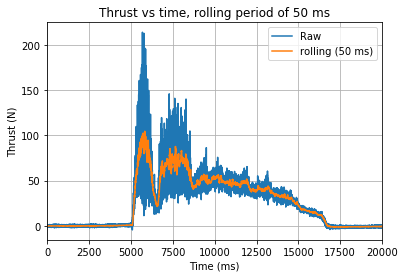

In [97]:
plt.plot(data['Time ']-3900, thrust_N-thrust_N[0:5000].mean(), label='Raw')
plt.plot(data['Time ']-3900, (thrust_N.rolling(window=50).mean())-thrust_N[0:5000].mean(), label='rolling (50 ms)')
plt.grid()
plt.xlim(0, 20000)
plt.xlabel("Time (ms)")
plt.ylabel("Thrust (N)")
plt.legend()
plt.title('Thrust vs time, rolling period of 50 ms')

In [42]:
[t for t in thrust_cali if (t['Time (mS)'] < 30000 and t['Time (mS)'] > 25000)]

TypeError: string indices must be integers

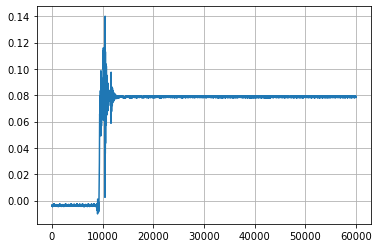

In [33]:
plt.plot(nitrous_cali['Thrust'])
plt.grid()

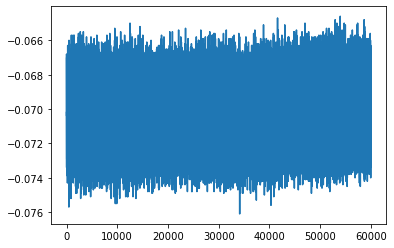

In [32]:
plt.plot(nitrous_cali['Nitrous'])